# Analyzing Time Between Machine Failures Using Exponential Distribution

## STEP 1: Problem Statement
"The maintenance team wants to model the time between machine failures in an automated assembly line to optimize preventive maintenance schedules."

## STEP 2: 5W1H Analysis

| Element | Description |
|--------|-------------|
| **What** | Time between machine failures |
| **Why** | Predict failure likelihood & reduce downtime |
| **When** | Continuous daily monitoring |
| **Where** | Plant B – Assembly Line |
| **Who** | Maintenance & Reliability Engineering |
| **How** | Model using Exponential Distribution (continuous, memoryless process) |

# STEP 3: When to Use Exponential Distribution

Continuous time between independent events (e.g., failures, arrivals).

Memoryless: Future does not depend on past.

Data: Failure time gaps like [2.3h, 5.1h, 1.8h...]

# STEP 4: Simulate Data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

np.random.seed(42)

# Assume avg time between failures is 4 hours (λ = 1/4 = 0.25)
failure_gaps = np.random.exponential(scale=4, size=100)  # 100 failure intervals
df = pd.DataFrame({'Failure_Interval_Hours': failure_gaps})
df.head()

,Failure_Interval_Hours
0,1.877072
1,12.040486
2,5.266983
3,3.651770
4,0.678499


# STEP 5: Data Summary & Visualization

       Failure_Interval_Hours
count              100.000000
mean                 3.658992
std                  3.679142
min                  0.022150
25%                  0.858793
50%                  2.496002
75%                  5.240373
max                 17.336585


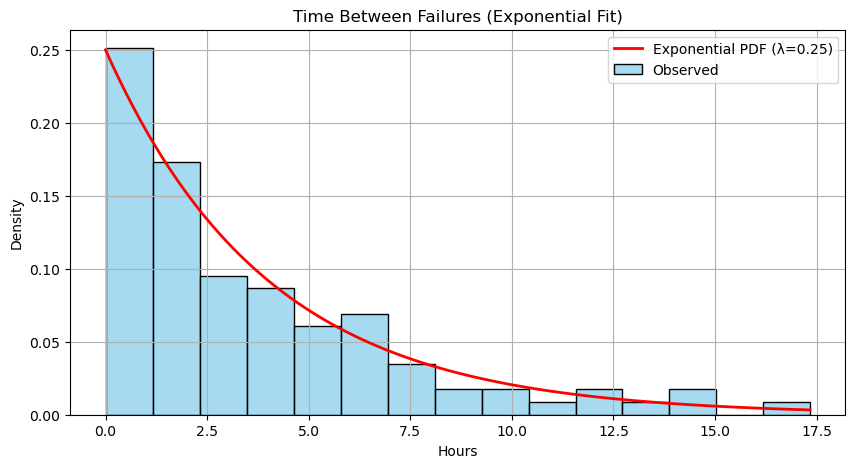

In [54]:
print(df.describe())

# Histogram + PDF
plt.figure(figsize=(10,5))
sns.histplot(df['Failure_Interval_Hours'], bins=15, kde=False, stat="density", color='skyblue', label='Observed')
x = np.linspace(0, df['Failure_Interval_Hours'].max(), 100)
plt.plot(x, expon.pdf(x, scale=4), 'r-', lw=2, label='Exponential PDF (λ=0.25)')
plt.title('Time Between Failures (Exponential Fit)')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# STEP 6: Probability Modeling

"What's the probability that the next failure happens within 2 hours?"

In [58]:
# λ = 1/mean
mean_interval = df['Failure_Interval_Hours'].mean()
λ = 1 / mean_interval

# P(T <= 2)
p_within_2h = expon.cdf(2, scale=1/λ)
print(f"Probability that next failure happens within 2 hours: {p_within_2h:.4f}")


Probability that next failure happens within 2 hours: 0.4211


In [66]:
# λ = 1/mean
mean_interval = df['Failure_Interval_Hours'].mean()
λ = 1 / mean_interval

# P(T <= 5)
p_within_5h = expon.cdf(5, scale=1/λ)
print(f"Probability that next failure happens within 5 hours: {p_within_5h:.4f}")


Probability that next failure happens within 5 hours: 0.7450


## STEP 7: Interpretation
If P(T ≤ 2 hours) = 0.4211, then ~42% of failures occur within 2 hours.

Can set alerts or buffer zones for maintenance team.